# Camera Manipulation with OpenCv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

**Get the references to webcam**

cam = cv2.VideoCapture(0)  # 0 is my cam index

while(True):
    #Let's read frames
    _,frame = cam.read()
    # show the frame
    cv2.imshow('capured frame',frame)
    
    # now quit camera if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cam.release()  # releasing all the resources
cv2.destroyAllWindows()

Lets twick that camera recording
stuffs we gonna do:
* Rescalling the o/p frame.
* Flipping it to achieve mirror.
* Add a green rectangle on our region of interest.

In [2]:
cam = cv2.VideoCapture(0)
height = 500
raw_frames = []
count = 0
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    _,frame = cam.read()
    
    #flip the  frame
    frame = cv2.flip(frame,1)  #  1 means means flipping around y-axis. Negative value
    # Rescaling camera o/p
    aspect =  frame.shape[1] / float(frame.shape[0])
    res = int(aspect * height) # menas landscape orientation
    frame = cv2.resize(frame, (res,height))
    
    # Add rectangle
    cv2.rectangle(frame, (175,80),(533,425), (0,255,0),2)
    cv2.putText(frame,'{} picture saved!!'.format(count),(31,34), font, 1,(255,255,255),2)
    cv2.imshow('captured frame', frame)
    # now quit camera if 'q' is pressed or save when 's' is pressed
    key = cv2.waitKey(1)
    if key & 0xFF == ord('q'):  # quit
        break
    elif key & 0xFF == ord('s'):  #  save
        count += 1
        raw_frames.append(frame)  # images are being stored here.
        # show the frame
#         plt.imshow(frame)
#         plt.show()
cam.release()
cv2.destroyAllWindows()

Ohh!! Thats great!!!
Now lets see all of those pictures that we captured

In [19]:
def show_images():
    for image in raw_frames:
        plt.imshow(image)
        plt.show()

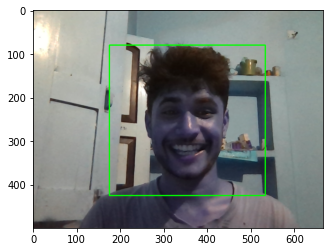

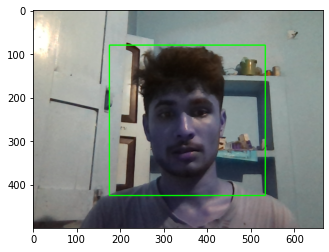

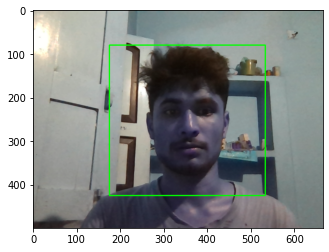

In [20]:
show_images()

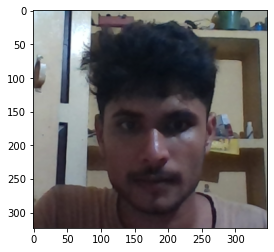

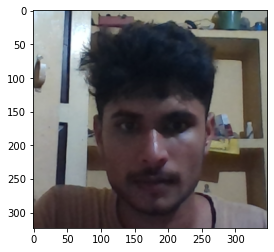

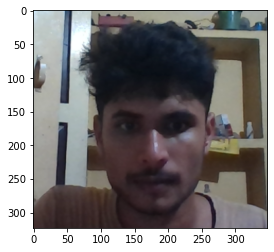

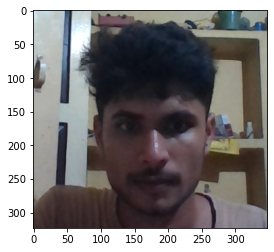

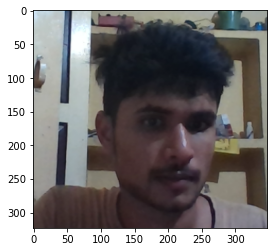

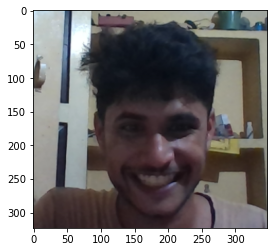

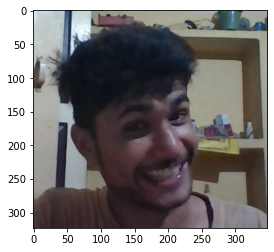

In [6]:
#Thses images looks green like color so let's fix them
images = []

for frame in raw_frames:
   roi = frame[100+1:425-1, 180+1:530-1]  # y1 and y2 menas from top left to bottom left similarly x1 and x2 means top left to top right.
   #Now parse BGR to RGB
   roi = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
   images.append(roi)
   plt.imshow(roi)
   plt.show()

frame[100+1:425-1, 180+1:530-1] You can think of it array slicing y repersent vertical side and represent horiezontal side.in array slicing [raw_start:raw_end, col_start:col_end] similarly here [top_start_y1:bottom_end_y2, left_start_x1:right_end_x2]

Now lets resize our images into 224*224

In [9]:
for i,frame in enumerate(raw_frames):
    #get the roi
    roi = frame[100+1:425-1, 180+1:530-1]
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi,(96,96))  # resizing our images
    #lets save then in a folder.
    cv2.imwrite('./faces/{}.png'.format(i),cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
    

In [15]:
img = cv2.imread('./faces/5.png')

In [16]:
dim = img.shape

In [17]:
dim

(96, 96, 3)